In [340]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Informations

In [341]:
df = pd.read_csv("./UpdatedResumeDataSet.csv")
df.shape # size of the dataset

(962, 2)

In [342]:
df.head(10) # first 10 rows of the dataset

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [343]:
df['Category'].value_counts() # number of resumes in each category

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [344]:
df.isnull().sum() # number of null values in each column

Category    0
Resume      0
dtype: int64

In [345]:
category_counts = df['Category'].value_counts() # number of resumes in each category
label = df['Category'].unique() # unique categories
print(label)
print('--------------------------------------------------------------------------------------')
print(category_counts)

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
--------------------------------------------------------------------------------------
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering     

## Graphics representing my dataframe

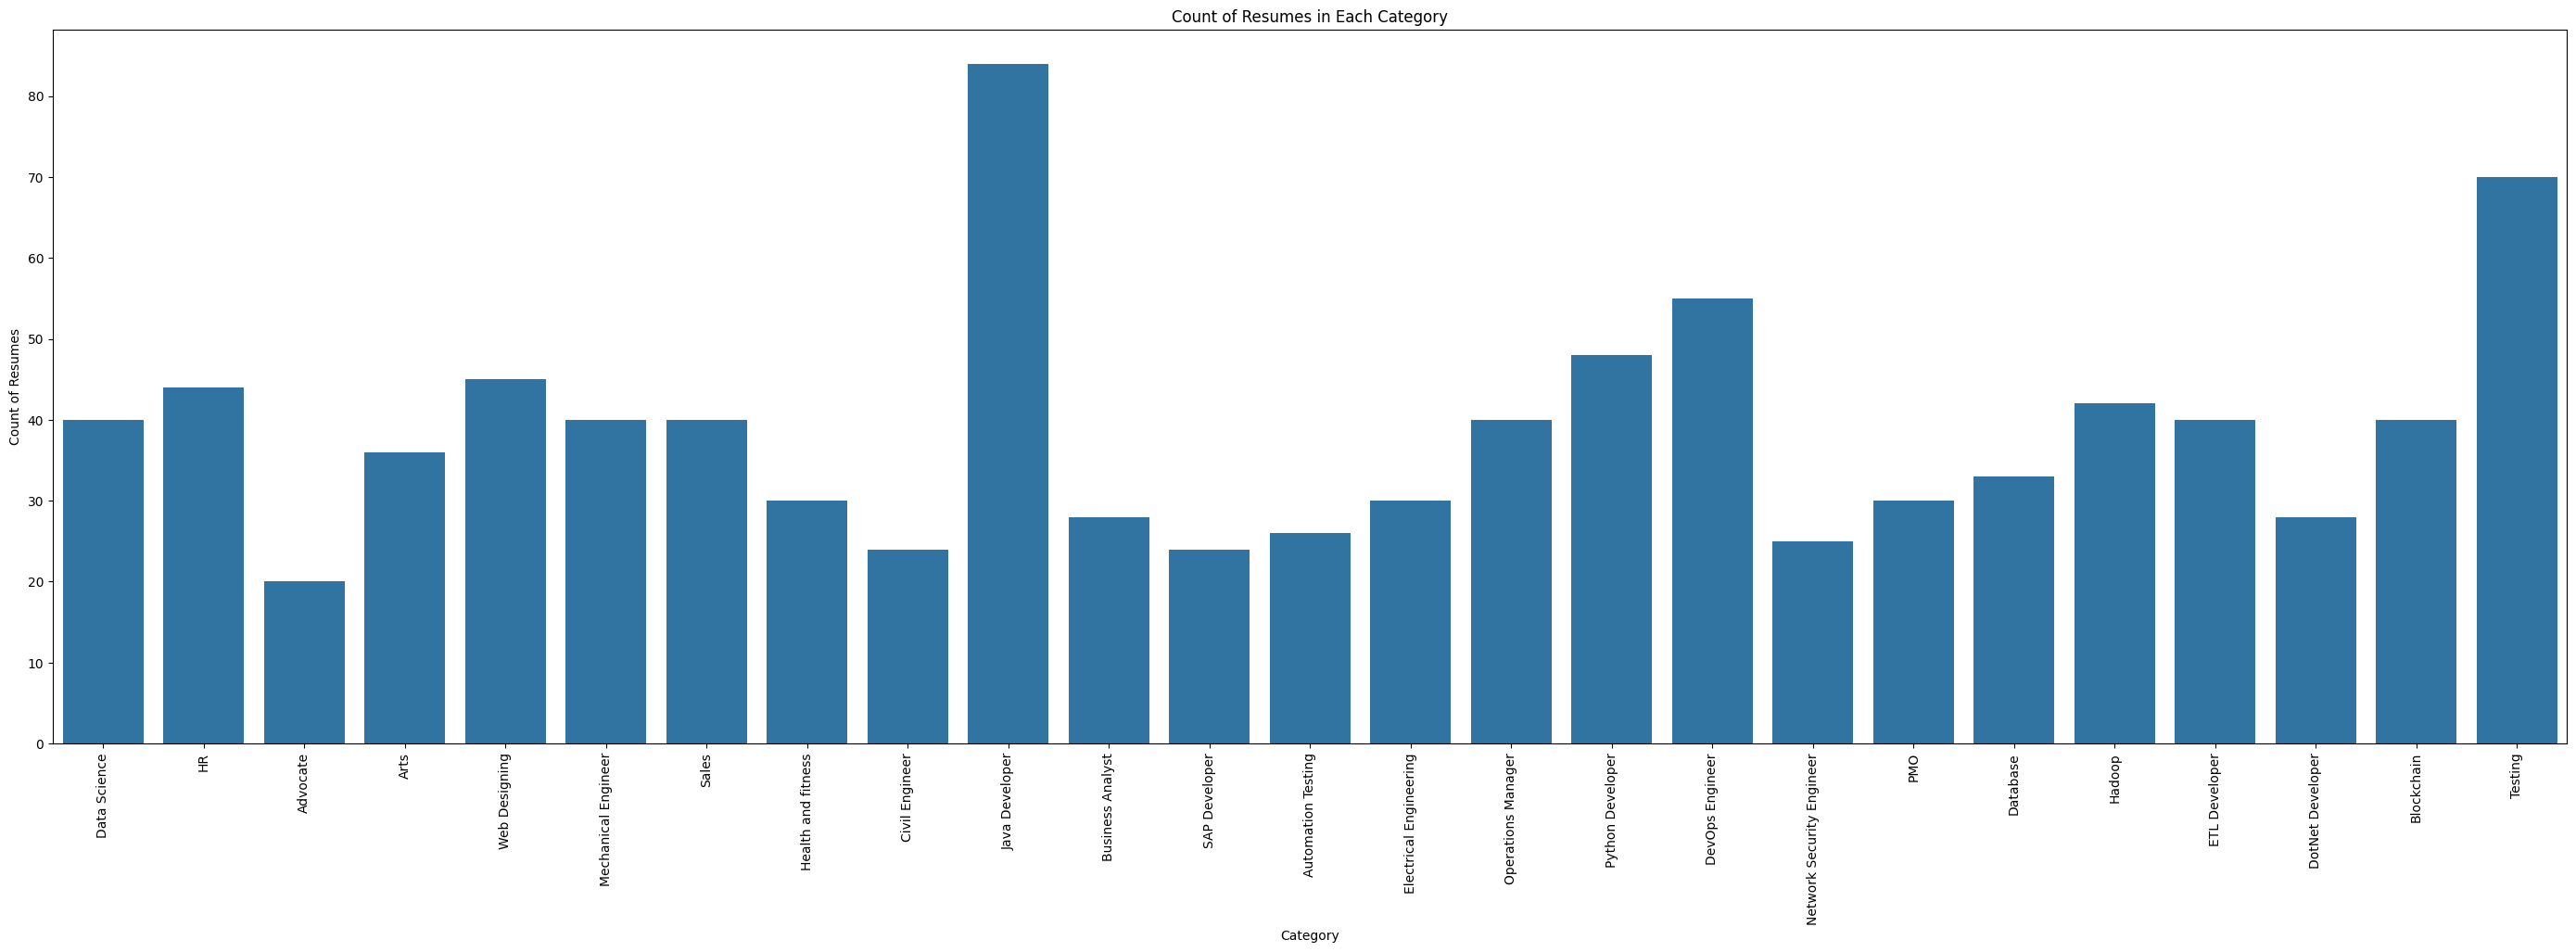

In [346]:
# histogram of the number of resumes in each category
plt.figure(figsize=(35,10))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count of Resumes')
plt.title('Count of Resumes in Each Category')
plt.show()

([<matplotlib.patches.Wedge at 0x28c60cf50>,
 [Text(-0.2979793960912592, 1.058871228953308, 'Data Science'),
  Text(-0.7714413269322117, 0.7841417468169058, 'HR'),
  Text(-1.0193330903024107, 0.4134731563409382, 'Advocate'),
  Text(-1.098680503736666, 0.053862331076050526, 'Arts'),
  Text(-1.0645062447830609, -0.2771758554020647, 'Web Designing'),
  Text(-0.9404289479119671, -0.5706079161115721, 'Mechanical Engineer'),
  Text(-0.7454269473310228, -0.8089120262381767, 'Sales'),
  Text(-0.5048230860860723, -0.9773196261993996, 'Health and fitness'),
  Text(-0.23525762625789812, -1.0745482070561094, 'Civil Engineer'),
  Text(0.05027403646251956, -1.098850545460012, 'Java Developer'),
  Text(0.3323937567981555, -1.0485773173407904, 'Business Analyst'),
  Text(0.5919549473825096, -0.9271404102234841, 'SAP Developer'),
  Text(0.811341998053472, -0.7427813690411197, 'Automation Testing'),
  Text(0.9689467079271352, -0.5207132389301882, 'Electrical Engineering'),
  Text(1.0607948226234707, -0.

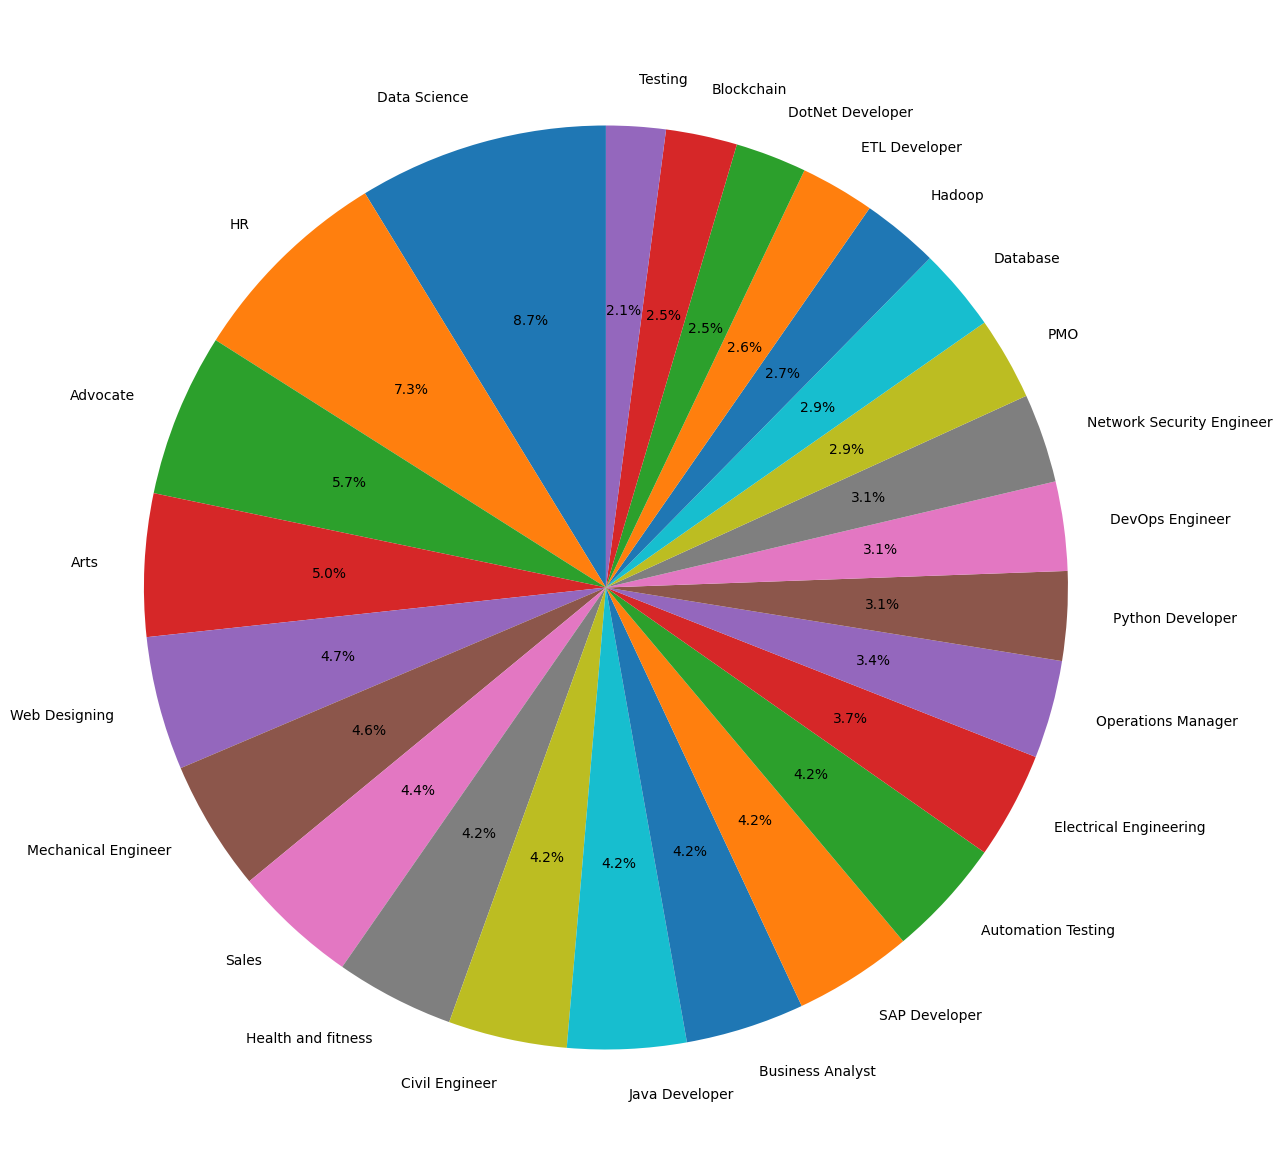

In [347]:
# pie chart of the number of resumes in each category
plt.figure(figsize=(45,15))
plt.pie(category_counts, labels=label, autopct='%1.1f%%', startangle=90)

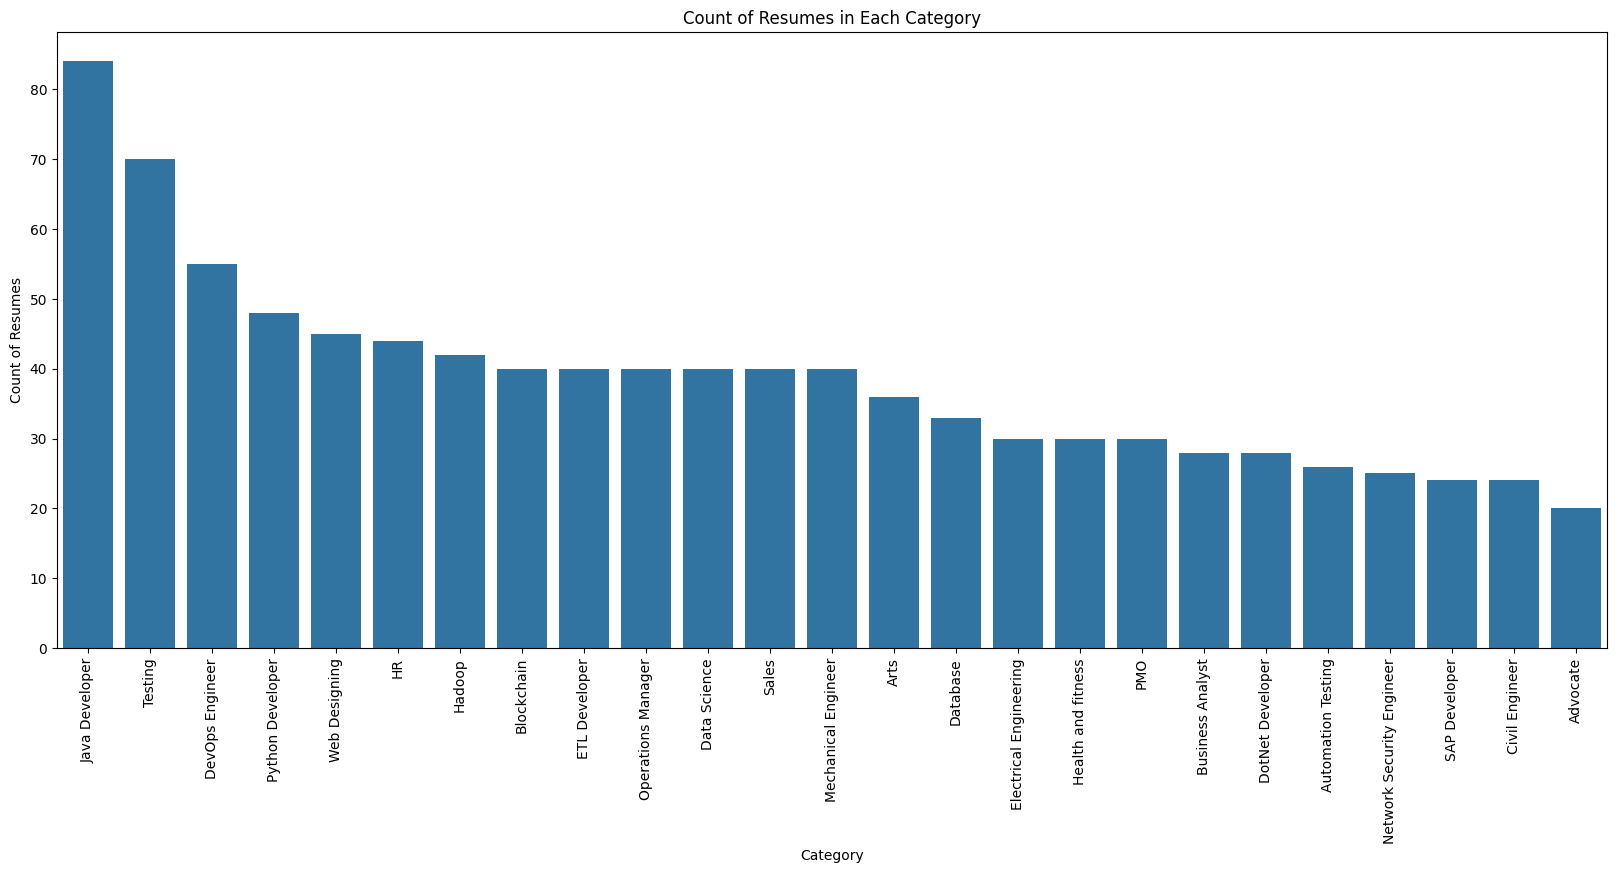

In [348]:
plt.figure(figsize=(20, 8))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts())
plt.xlabel('Category')
plt.ylabel('Count of Resumes')
plt.title('Count of Resumes in Each Category')
plt.xticks(rotation=90)
plt.show()


## Resume Analysis

In [349]:
print(df['Category'][0])
print(df['Resume'][0])

Data Science
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Ser

## Cleanup

1. URLs
2. Hashtags
3. Mentions
4. Special letters
5. Punctuations

In [350]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('#\S+\s', ' ', resumeText)  # remove hashtags
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',' ', resumeText) #remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText.lower()

cleanResume(df['Resume'][90]) # cleaned resume 

'skills natural languages proficient in english hindi and marathi computer skills proficient with ms office internet operation education details january 2015 to january 2018 llb law mumbai maharashtra mumbai university january 2015 b m m mumbai maharashtra s k somaiya college mumbai university h s c asmita girls junior college maharashtra board s s c vidya bhawan maharashtra board advocate llb student and journalist skill details company details company criminal lawyer law firm description '

### Parse Imported CV 

In [351]:
from PyPDF2 import PdfReader

def transformPdfToText(file):
    cv_text = PdfReader(file).pages[0].extract_text().lower()
    return cv_text

cv_text = transformPdfToText('./Amira_Tamakloe_CV_English.pdf')
cleanResume(cv_text)

' amira tamakloe 438 522 5369 montreal qc tamakloeamira education polytechnique montr al bachelor of software engineering august 2021 may 2025 relevant courses data structures and algorithms advanced object oriented programming calculus linear algebra software analysis web programming conception of databases design additional courses aws cloud practitioner and cloud foundation certification january 2022 learned the basics of amazon cloud azure fundamentals with a cloud guru may 2023 technical skills languages proficient python c java javascript typescript languages previous experience html css vhdl technologies azure portal terraform powershell microsoft office visual studio github dataframes json csv various apis python libraries numpy scipy matplotlib seaborn pygames nosql sql aws s3 lambda angular react express nodejs mongodb figma aws console experience amazon software development intern may 2023 august 2023 amazon vancouver bc developed and tested a full stack website using react 

Apply the cleanResume function to every resume for analysis

In [352]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))  # clean resumes in the dataset
print(df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


## Words into categorical values

In [353]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encoded_labels = le.fit(df['Category'])
df['Category'] = le.transform(df['Category']) # assign a number to each category
df.Category.unique() # check the unique numbers assigned to each category
print(label)

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [354]:
# Fit and transform the 'Category' column to numerical labels
df['Encoded_Category'] = le.fit_transform(df['Category'])
# Retrieve the unique numerical labels assigned to each category
unique_labels = df['Encoded_Category'].unique()
# Create a mapping between encoded labels and their original category names
category_mapping = {}
for index, label_val in enumerate(unique_labels):
    category_name = label[index]
    category_mapping[label_val] = category_name

# Print the mapping between encoded labels and category names
print("Encoded Label : Category Name")
for label_val, category_name in category_mapping.items():
    print(f"{label_val} : {category_name}")


Encoded Label : Category Name
6 : Data Science
12 : HR
0 : Advocate
1 : Arts
24 : Web Designing
16 : Mechanical Engineer
22 : Sales
14 : Health and fitness
5 : Civil Engineer
15 : Java Developer
4 : Business Analyst
21 : SAP Developer
2 : Automation Testing
11 : Electrical Engineering
18 : Operations Manager
20 : Python Developer
8 : DevOps Engineer
17 : Network Security Engineer
19 : PMO
7 : Database
13 : Hadoop
10 : ETL Developer
9 : DotNet Developer
3 : Blockchain
23 : Testing


### Vactorization

In [355]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # remove stop words ex: the, a, an, is, are, etc. to keep only important words
tfidf.fit(df['Resume']) # kind of a dictionary of all the words in the dataset without the stop words
requiredText = tfidf.transform(df['Resume'])  # converts the resumes in the dataset into a matrix of numbers (row = resume, column = word)
requiredText.shape # size of the matrix

(962, 7351)

### Splitting

In [356]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(requiredText, df['Category'], random_state=0, test_size=0.2) 
# split the dataset into training and testing sets (random_state = 0 to get the same split everytime) (test_size = 0.2 to split the dataset into 80% training and 20% testing)

In [357]:
X_train.shape # size of the training set

(769, 7351)

In [358]:
X_test.shape # size of the testing set

(193, 7351)

## Model Training and Classification

In [359]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier()) # one vs rest classifier to classify the resumes into multiple categories
clf.fit(X_train,Y_train) # train the model using the training set
ypred = clf.predict(X_test) # predict the categories of the resumes in the testing set
print(accuracy_score(Y_test,ypred)) # accuracy of the model by comparing the predicted categories with the actual categories of the resumes in the testing set

0.9792746113989638


In [360]:
ypred

array([20, 14, 15, 17, 15, 14, 10, 14, 15, 11,  6, 23,  4, 11, 13,  4, 19,
        8,  8,  9, 12, 11, 17, 22, 19, 16,  5,  8,  3, 24, 20, 18, 22,  7,
       23, 23, 22, 18,  7, 20, 10, 20, 14,  8, 15, 15,  8, 11,  4, 22,  1,
       24, 14, 15, 22, 23,  8, 15,  3, 17, 18,  3,  0, 15, 15, 15, 16, 21,
       13, 18, 12, 23, 22, 12, 13, 22,  8,  7, 19,  4, 24, 14,  7,  1, 24,
       13, 12, 10,  9,  8, 22,  9, 23, 11,  9, 23, 11, 15, 23, 13,  4, 17,
        2,  5,  6, 10,  0, 19, 20, 10, 22, 10, 15, 10, 15, 15, 22, 15, 14,
        6,  0,  4,  5,  7,  9, 13, 23,  6,  9,  9, 21, 11,  5,  3,  9, 24,
       19, 13,  8,  3, 13, 13, 11, 20, 16, 23, 21, 24,  7, 21, 20, 15, 22,
       19, 15, 23,  9, 15, 15,  6,  2, 20,  7, 11, 23, 24,  8,  3, 20,  2,
       10, 22, 15,  2, 11, 23,  1, 23,  6,  3,  3, 24, 24, 12,  5, 23, 18,
       22, 20, 20,  3,  6, 15])

In [361]:
Y_test_pred = clf.predict(X_train) # predict the categories of the resumes in the training set

In [362]:
Y_test_pred

array([ 8, 16, 15,  5, 12, 12, 17, 16, 24, 10, 19, 16,  5, 23,  5,  5,  6,
       19,  4, 16, 17,  0,  4, 12,  4, 18, 20,  3, 18, 17,  6, 11, 21, 22,
       23, 23,  9,  4, 24, 14,  2, 10, 14, 18, 13,  2,  7, 10, 20, 12, 24,
        8, 15,  2,  2, 13, 18,  3, 11, 11, 12, 12, 15, 24,  3, 21, 18, 11,
        7,  6, 15, 24, 16, 16,  7, 23, 24,  8, 21,  5,  6,  1, 12, 21, 15,
       15, 22,  3, 15, 13, 23,  3, 18,  6,  3, 13, 15, 14, 12, 12, 10, 20,
        5,  1, 14, 12, 12, 19, 22, 10, 17, 23, 12, 13, 12,  8,  1,  8, 19,
       15, 23, 13,  1,  6, 24,  1, 11, 22,  3, 22, 15, 15, 23,  9,  2, 15,
        3, 13,  4,  6, 16, 23,  8, 23, 20, 22, 15, 24, 16,  3, 11,  5, 19,
        8,  5, 12, 11, 15, 16, 15,  3, 20,  3,  6,  8, 23, 22, 22,  7,  6,
       12, 24, 15, 10,  4, 23,  1,  3, 10, 18,  0,  4,  2, 18, 20, 23,  9,
       16, 11, 24, 22, 16, 13,  3, 15, 18, 23,  8, 10, 24, 21, 18,  7,  1,
       12, 20,  8, 16, 14, 24,  4, 11,  8, 23, 17,  0, 18, 20, 22, 15,  8,
       17, 17,  9,  3, 16

## Prediction System

In [363]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb')) # save the tfidf model to use it later to convert the resumes into a matrix of numbers
pickle.dump(clf, open('clf.pkl', 'wb')) # save the model to use it later to predict the categories of the resumes

In [364]:
import pickle

clf = pickle.load(open('clf.pkl', 'rb')) # Load the trained classifier
cleaned_resume = cleanResume(cv_text)  # Clean the input resume
input_features = tfidf.transform([cleaned_resume]) # Transform the cleaned resume using the trained TfidfVectorizer
prediction_id = clf.predict(input_features)[0] # Make the prediction using the loaded classifier

print(f"prediction ID : {prediction_id}\nCategory Name : {category_mapping[prediction_id]}")

prediction ID : 20
Category Name : Python Developer


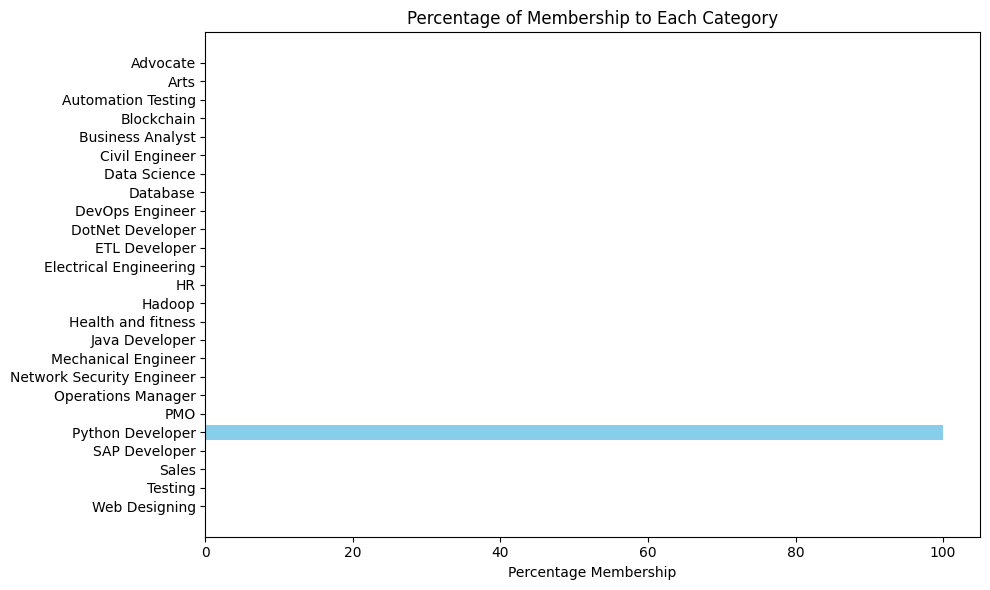

In [365]:
input_features = tfidf.transform([cleaned_resume])
prediction_probabilities = clf.predict_proba(input_features)[0]

total_prob = sum(prediction_probabilities)
percentage_membership = {
    category_mapping[category]: (probability / total_prob) * 100 
    for category, probability in enumerate(prediction_probabilities)
}

# Bar chart of the percentage membership to each category
plt.figure(figsize=(10, 6))
plt.barh(list(percentage_membership.keys()), list(percentage_membership.values()), color='skyblue')
plt.xlabel('Percentage Membership')
plt.title('Percentage of Membership to Each Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [366]:
input_features = tfidf.transform([cleaned_resume])
predicted_category = clf.predict(input_features)[0]
predicted_category_text = requiredText[df['Category'] == predicted_category]
input_words_set = set(cleaned_resume.split())
category_words_set = set(tfidf.inverse_transform(predicted_category_text)[0])

common_words = input_words_set.intersection(category_words_set)
missing_words = category_words_set - input_words_set

# Writing results to a text file
with open('common_and_missing_words.txt', 'w') as file:
    file.write(f"Predicted Category: {predicted_category}\n")
    file.write("Common words:\n")
    file.write('\n'.join(common_words))
    file.write("\n----------------------------------------------------------------------\n")
    file.write("Words in Category but Missing in CV:\n")
    file.write('\n'.join(missing_words))
    file.write("\n----------------------------------------------------------------------\n")
